#MOBILE PRICE CLASSIFICATION

IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
df = pd.read_csv("mobile_classification_train.csv")

**Context**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### DATA DESCRIPTION

battery_power : Total energy a battery can store in one time measured in mAh

blue : Has bluetooth or not

clock_speed : speed at which microprocessor executes instructions 

dual_sim : Has dual sim support or not

fc : Front Camera mega pixels

four_g : Has 4G or not

int_memory : Internal Memory in Gigabytes

m_dep: Mobile Depth in cm 

mobile_wt : Weight of mobile phone

n_cores : Number of cores of processor 

pc : Primary Camera mega pixels

px_height : Pixel Resolution Height

px_width : Pixel Resolution Width

ram : Random Access Memory in Mega Bytes

sc_h : Screen Width of mobile in cm

talk_time : longest time that a single battery charge will last 

three_g : Has 3G or not

touch_screen : Has touch screen or not 

wifi : Has wifi or not 

price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.duplicated().any()

False

**CHECKING FOR MISSING VALUES**

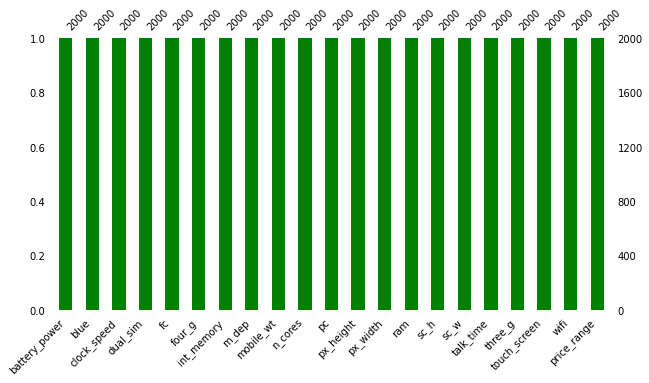

Total null values :  0


In [ ]:
import missingno as msno
msno.bar(df,figsize=(10,5),fontsize=10,color="g")
plt.show()
print("Total null values : ",df.isnull().sum().sum())

CHECKING THE CATEGORICAL VALES

In [ ]:
categ_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']

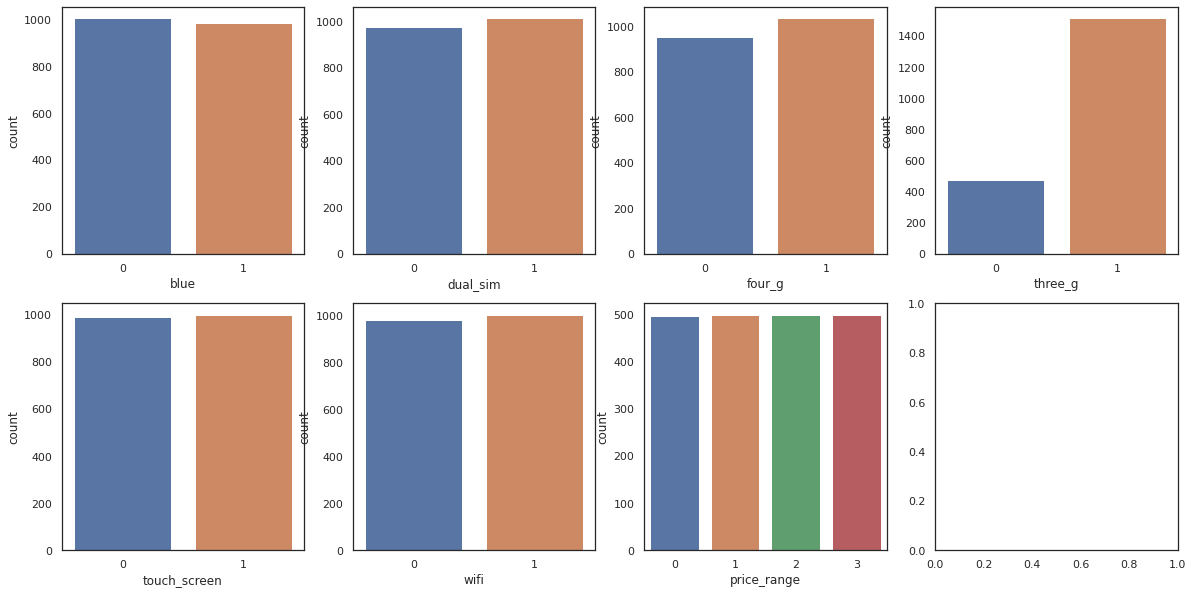

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
for i, j in zip(categ_col,ax.flatten()):
    sns.countplot(df[i],ax=j)
plt.show()

CHECKING THE NUMERICAL COLUMNS

In [ ]:
numeric_col = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

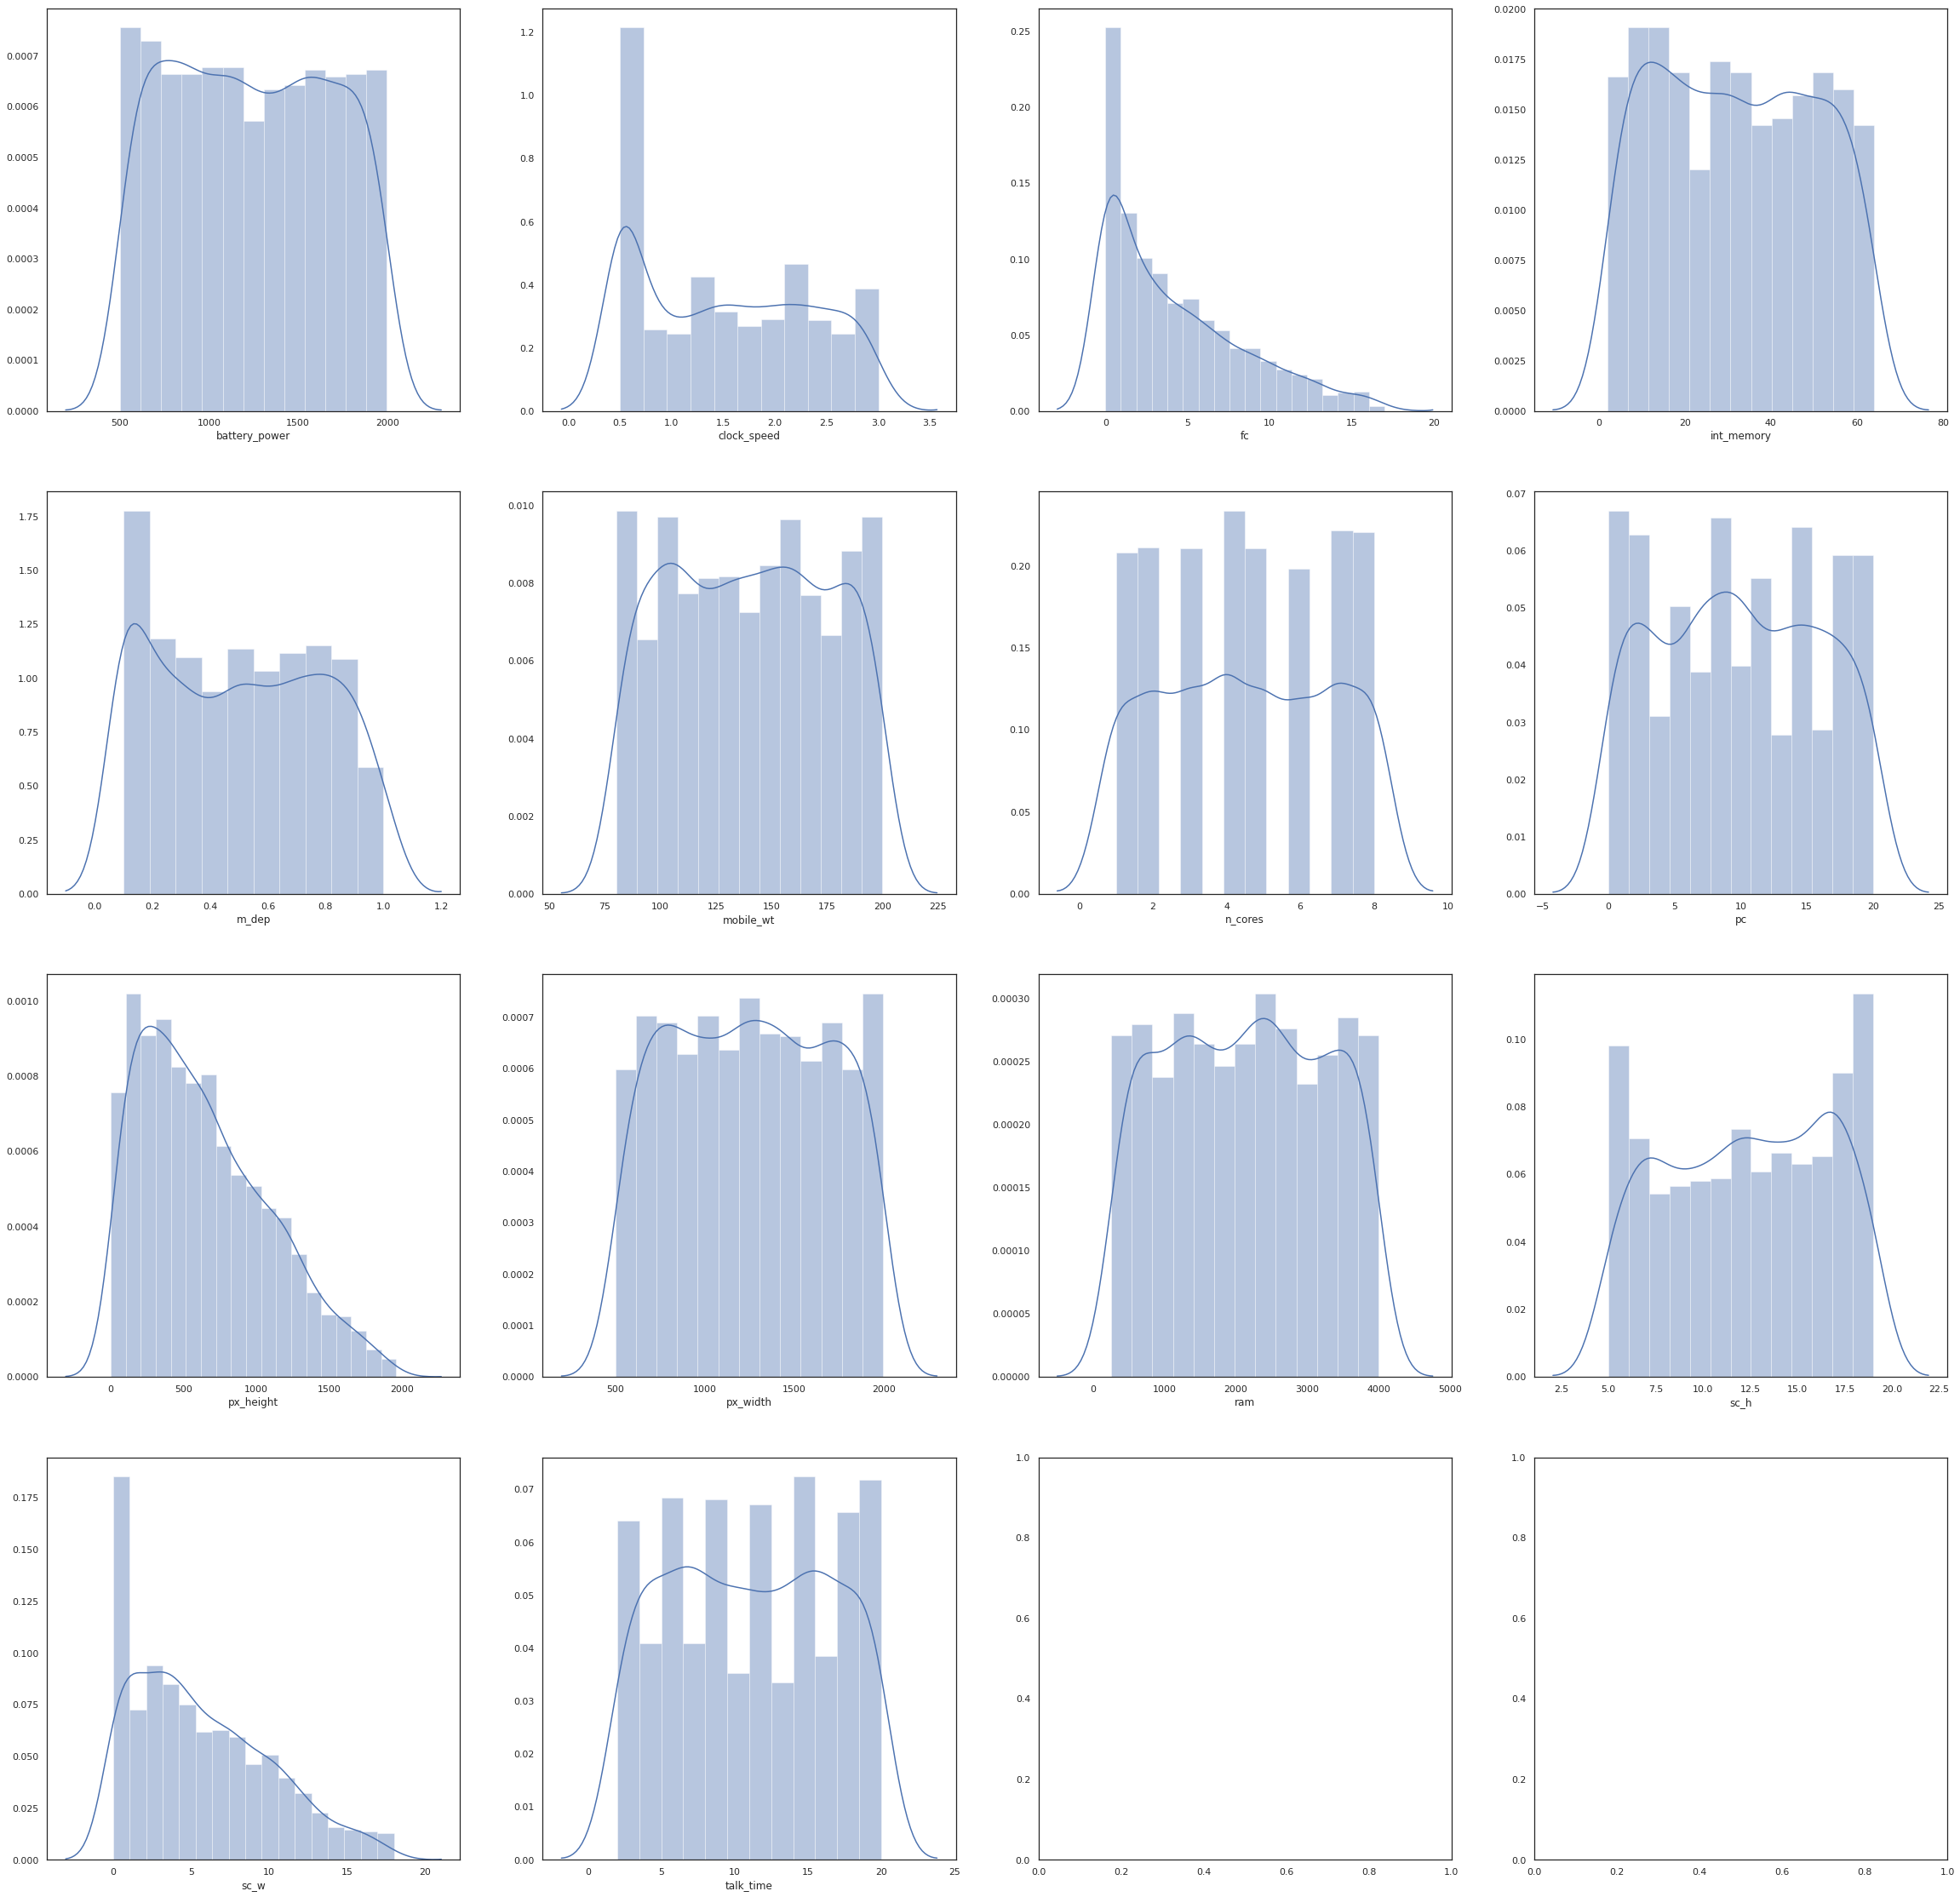

In [ ]:
fig, ax = plt.subplots(4,4,figsize=(40,40))
for i, j in zip(numeric_col,ax.flatten()):
    sns.distplot(df[i],ax=j)
plt.show()

CORRELATION MATRIX

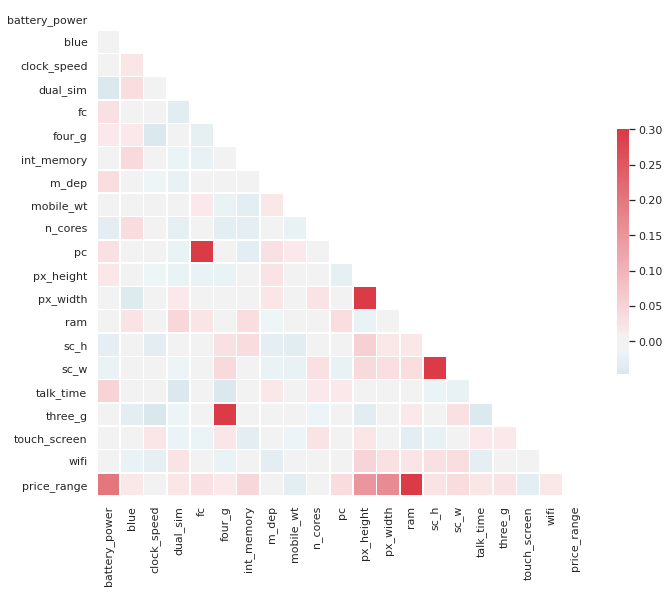

In [ ]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As we can see our target price range has highly positive correlation between ram.

Also Features such as 3G and 4G

pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)

px_width(Pixel Resolution Width) and px_height(Pixel Resolution Height)

sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

In [ ]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

CHECKING FOR OUTLIERS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

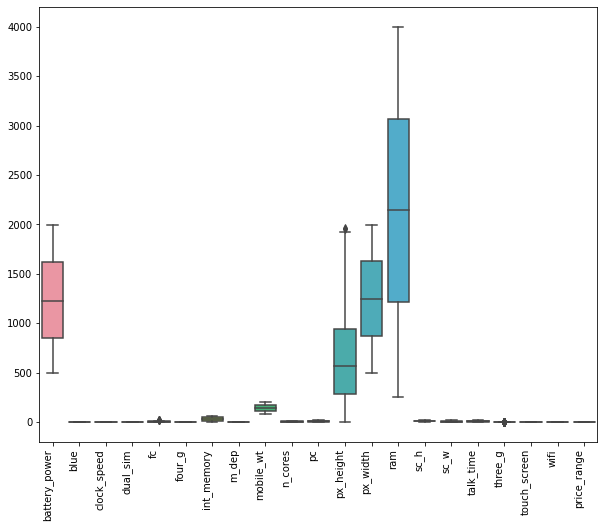

In [ ]:
fig = plt.figure(figsize=(10,8))
box =sns.boxplot(data = df)
plt.xticks(
    rotation=90, 
    horizontalalignment='right'
)

In [ ]:
from scipy import stats
df=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [ ]:
df.shape

(1988, 21)

12 OUTLIERS REMOVED


---

FURTHER EXPLORING THE DATA

In [ ]:
range_0 = df[df['price_range'] == 0]
range_1 = df[df['price_range'] == 1]
range_2 = df[df['price_range'] == 2]
range_3 = df[df['price_range'] == 3]

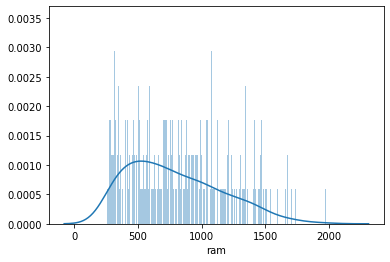

In [ ]:
sns.distplot(range_0['ram'], bins=500, hist=True, kde=True)

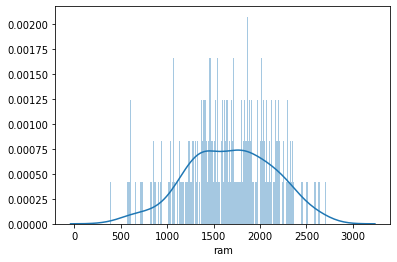

In [ ]:
sns.distplot(range_1['ram'], bins=500, hist=True, kde=True)

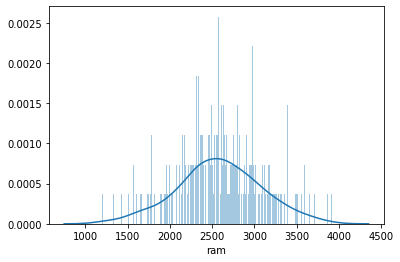

In [ ]:
sns.distplot(range_2['ram'], bins=500, hist=True, kde=True)

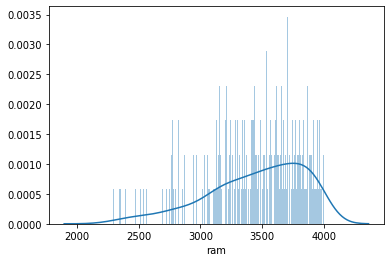

In [ ]:
sns.distplot(range_3['ram'], bins=500, hist=True, kde=True)

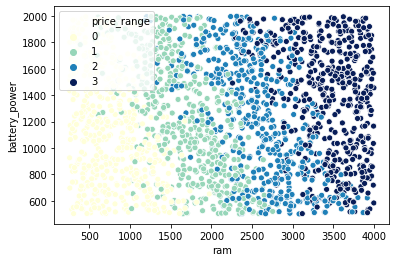

In [ ]:
sns.scatterplot(x='ram',y='battery_power',hue='price_range',data = df,palette='YlGnBu',legend='full')

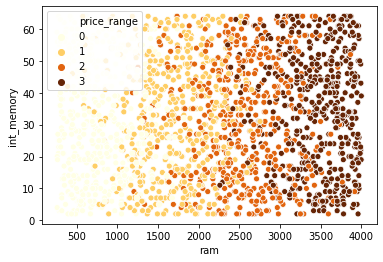

In [ ]:
sns.scatterplot(x='ram',y='int_memory',hue='price_range',data = df,palette='YlOrBr',legend='full')

ACCUMULATING VARIABLES TO MAKE BETTER SENSE

In [ ]:
df_final = df.copy()

In [ ]:
df_final['screen_size'] = np.sqrt((df['sc_h']^2)+(df['sc_w']^2))

In [ ]:
df_final['PPI'] = np.sqrt((df['px_width']**2)+(df['px_height']**2))/df_final['screen_size']

In [ ]:
df_final.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_size,PPI
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,4.000000,189.066126
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,4.472136,488.424457
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,3.000000,710.228836
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,5.291503,408.326375
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,3.162278,541.129190


In [ ]:
df_final.drop(columns=['px_width','px_height','sc_h','sc_w'],axis=1,inplace=True)

In [ ]:
df_final.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,screen_size,PPI
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,4.000000,189.066126
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,4.472136,488.424457
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,3.000000,710.228836
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,5.291503,408.326375
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,3.162278,541.129190


In [ ]:
df_final.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'screen_size', 'PPI'],
      dtype='object')

In [ ]:
df_final = df_final[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'screen_size', 'PPI', 'price_range']]

In [ ]:
df_final.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,screen_size,PPI,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,4.000000,189.066126,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,4.472136,488.424457,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,3.000000,710.228836,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,5.291503,408.326375,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,3.162278,541.129190,1


In [ ]:
X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
for name, importance in zip(X.columns, model.feature_importances_):
  print(name, "=", round(importance,4))

battery_power = 0.0542
blue = 0.0003
clock_speed = 0.0025
dual_sim = 0.0005
fc = 0.0023
four_g = 0.0006
int_memory = 0.0039
m_dep = 0.003
mobile_wt = 0.0062
n_cores = 0.0023
pc = 0.0028
ram = 0.867
talk_time = 0.0032
three_g = 0.0005
touch_screen = 0.0004
wifi = 0.0004
screen_size = 0.0106
PPI = 0.0393


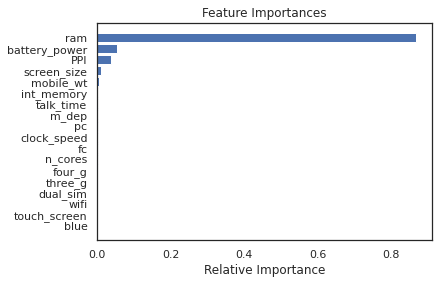

In [ ]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
def train_logit(X,y):
    from sklearn.metrics import make_scorer, fbeta_score
    from sklearn.model_selection import RandomizedSearchCV 
    logit = LogisticRegression(n_jobs = -1)
    parameters = {'penalty': ('l1', 'l2', 'elasticnet'), 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
    clf1 = RandomizedSearchCV(logit, parameters, random_state=42, n_jobs=-1, n_iter=20)
    clf1.fit(X, y)
    return clf1.best_estimator_

clf1 = train_logit(X_train, y_train)

y_pred = clf1.predict(X_test)


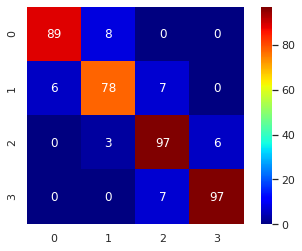

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, annot=True, cmap=plt.cm.jet, fmt='.00f')  

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        97
           1       0.88      0.86      0.87        91
           2       0.87      0.92      0.89       106
           3       0.94      0.93      0.94       104

    accuracy                           0.91       398
   macro avg       0.91      0.91      0.91       398
weighted avg       0.91      0.91      0.91       398



In [ ]:
def train_tree(X,y):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import RandomizedSearchCV 
    tree = DecisionTreeClassifier()
    parameters = {'criterion':('gini','entropy'),'max_depth': (8, 9, 10, 11), 'min_samples_split': (10, 30, 50, 70, 100)}
    clf2 = RandomizedSearchCV(tree, parameters, random_state=42, n_jobs=-1, n_iter=20)
    clf2.fit(X, y)
    return clf2.best_estimator_

clf2 = train_tree(X_train, y_train)

y_pred = clf2.predict(X_test)

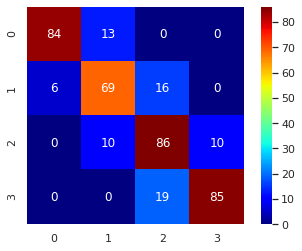

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, annot=True, cmap=plt.cm.jet, fmt='.00f')  

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        97
           1       0.75      0.76      0.75        91
           2       0.71      0.81      0.76       106
           3       0.89      0.82      0.85       104

    accuracy                           0.81       398
   macro avg       0.82      0.81      0.82       398
weighted avg       0.82      0.81      0.82       398



In [ ]:
def train_forest(X,y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import RandomizedSearchCV 
    classifier = RandomForestClassifier()
    parameters = {'max_depth': (8, 9, 10, 11), 'min_samples_split': (10, 30, 50, 70, 100),'n_estimators': (100,150,200,250),'criterion':('gini','entropy')}
    clf = RandomizedSearchCV(classifier, parameters, random_state=42, n_jobs=-1, n_iter=20)
    clf.fit(X, y)
    return clf.best_estimator_

clf = train_forest(X_train, y_train)

y_pred = clf.predict(X_test)


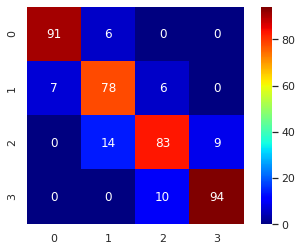

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, annot=True, cmap=plt.cm.jet, fmt='.00f')  

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        97
           1       0.80      0.86      0.83        91
           2       0.84      0.78      0.81       106
           3       0.91      0.90      0.91       104

    accuracy                           0.87       398
   macro avg       0.87      0.87      0.87       398
weighted avg       0.87      0.87      0.87       398



In [ ]:
def train_svm(X,y):
    from sklearn import svm
    from sklearn.model_selection import RandomizedSearchCV
    classifier = svm.SVC(verbose=True,probability=True)
    parameters = {'C': [0.1, 1, 10, 100],'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf','linear']} 
    clf3 = RandomizedSearchCV(classifier, parameters, random_state=42, n_jobs=-1, n_iter=10)
    clf3.fit(X, y)
    return clf3.best_estimator_

clf3 = train_svm(X_train, y_train)
y_pred = clf3.predict(X_test)

[LibSVM]

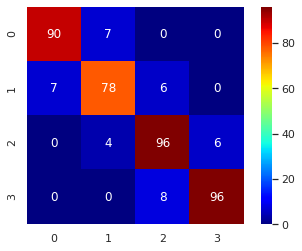

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
with sns.axes_style('white'):
    plt.figure()
    ax = sns.heatmap(cm, square=True, annot=True, cmap=plt.cm.jet, fmt='.00f')  

In [ ]:
from sklearn.metrics import classification_report
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        97
           1       0.88      0.86      0.87        91
           2       0.87      0.91      0.89       106
           3       0.94      0.92      0.93       104

    accuracy                           0.90       398
   macro avg       0.90      0.90      0.90       398
weighted avg       0.90      0.90      0.90       398

